In [1]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import h5py
from deep_filaments.io.utils import extract_patches

(313, 469)


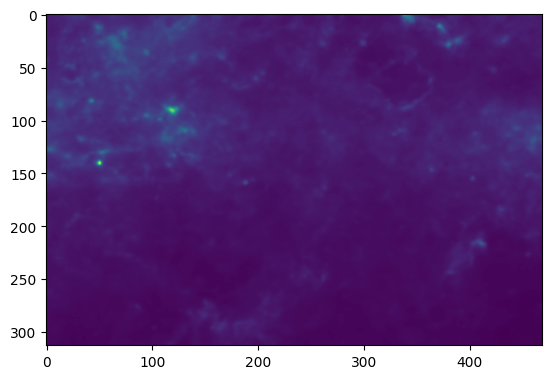

In [2]:
files = "/home/loris/PhD/Dev/Code/data_exploration/data/SEDIGISM/16/NH2_16_"

density = fits.getdata(files + "density.fits")
spines = fits.getdata(files + "spine.fits")
background = fits.getdata(files + "background.fits")
missing = fits.getdata(files + "missing.fits")
print(density.shape)
plt.imshow(density)

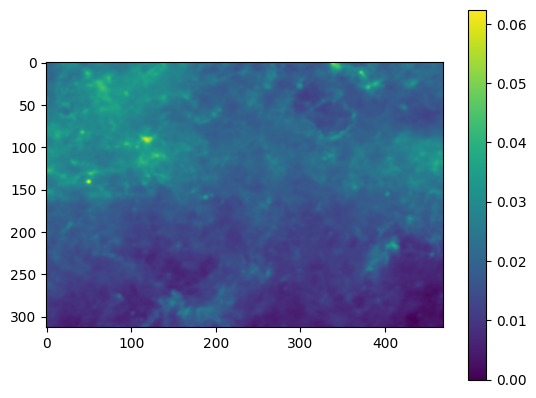

In [3]:
log_density = np.log10(density)
log_max = np.max(log_density)
log_min = np.min(log_density)
c = plt.imshow((log_density - log_min) / log_max)
plt.colorbar(c)
plt.show()

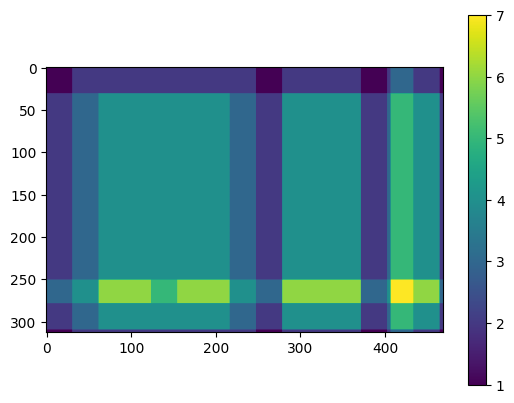

In [4]:
k = 10
test_area_size = 62
overlap = 31
test_fold_mask = np.array([np.zeros_like(density) for _ in range(k)])
x, y = 0, 0
while y + test_area_size <= density.shape[1]:
    fold = np.random.randint(0,k)
    x = 0
    while x + test_area_size <= density.shape[0]:
        test_fold_mask[fold][x : x + test_area_size, y : y + test_area_size] = 1
        fold = (fold + 1) % k
        x += test_area_size - overlap
        if density.shape[0] - test_area_size < x < density.shape[0] - overlap:
            x = density.shape[0] - test_area_size
    y += test_area_size - overlap
    if density.shape[1] - test_area_size < y < density.shape[1] - overlap:
        y = density.shape[1] - test_area_size
c = plt.imshow(np.sum(test_fold_mask, axis=0))
plt.colorbar(c)
plt.show()

In [5]:
k = 5
test_area_size = 62
overlap = 31
test_fold_mask = np.array([np.zeros_like(density) for _ in range(k)])
for i in range(len(test_fold_mask)):
    test_fold_mask[i][:, int(i * density.shape[1] / k) : int((i + 1) * density.shape[1] / k)] = 1

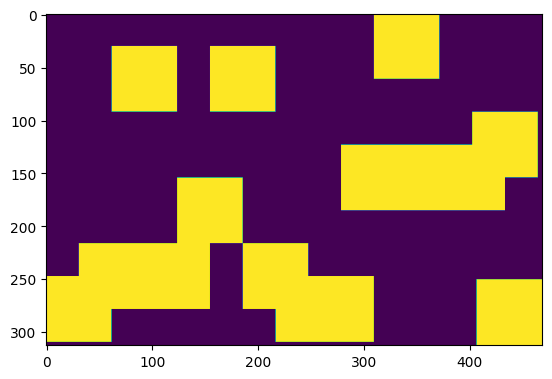

In [5]:
plt.imshow(test_fold_mask[4])

In [6]:
test_fold_0_mask = test_fold_mask[0]

In [7]:
test_patch_list = []
train_patch_list = []
patch_size = 32
overlap = 31
x, y = 0, 0
while y + test_area_size <= density.shape[1]:
    x = 0
    while x + test_area_size <= density.shape[0]:
        patch = density[x : x + patch_size, y : y + patch_size]
        mask = test_fold_0_mask[x : x + patch_size, y : y + patch_size]
        if mask.sum() == patch_size * patch_size:
            test_patch_list.append(patch)
        elif mask.sum() == 0:
            train_patch_list.append(patch)
        x += test_area_size - overlap
    y += test_area_size - overlap

In [7]:
hdfs = extract_patches(
        density,
        "../fold_0",
        (32, 32),
        train=False,
        target=spines,
        missing=missing,
        background=background,
        overlap=31,
        conservative=True,
        mask=test_fold_0_mask
    )
[hdf.close() for hdf in hdfs]

[None, None]